# The Sparks Foundation - Graduate Rotational Internship Program

## Name : Ausaf Fatima

## Task : Exploratory Data Analysis - Retail

### Description : Perform ‘Exploratory Data Analysis’ on the dataset ‘SampleSuperstore’ . As a business manager, try to find out the weak areas where you can work to make more profit. What all business problems you can derive by exploring the data? 

Importing the initial libraries required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.express as px

Setting the style.

In [2]:
sns.set_style('dark')
plt.style.use('seaborn-deep')

Reading the data from the csv file and taking a look at it.

In [3]:
df = pd.read_csv('SampleSuperstore.csv')

In [4]:
df

Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code Region         Category Sub-Category     Sales  Quantity  \
0           42420  South        Furniture    Bookcases  261.9600         2   
1           42420  South        Furniture       Chairs  731.9400         3   
2           90036   West  Office Supplies       Labels   14.6200         2   
3           33311  South        Furniture       Tables  957.5775         5   
4           33311  South  Office Supplies      Storage   22.3680         2   
...           ...    ...              ...          ...       ...       ...   
9989        33180  South        Furniture  Furnishings   25.2480         3   
9990        92627   West        Furniture  Furnishings   91.9600         2   
9991        92627   West       Technology       Phones  258.5760         2   
9992        92627   West  Office Supplies        Paper   29.6000         4   
9993        92683   West  Office Supplies   Appliances  243.1600         2   

      Discount    Profit  
0         0.00   41.9136  
1         0.00  219.5820  
2         0.00    6.8714  
3         0.45 -383.0310  
4         0.20    2.5164  
...        ...       ...  
9989      0.20    4.1028  
9990      0.00   15.6332  
9991      0.20   19.3932  
9992      0.00   13.3200  
9993      0.00   72.9480  

[9994 rows x 13 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df.describe()

Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000

Computing the number of unique values in each column.

In [7]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

Checking the distribution of Sales and Profit.

Text(0.5, 1.0, 'Distribution plot of Profit')

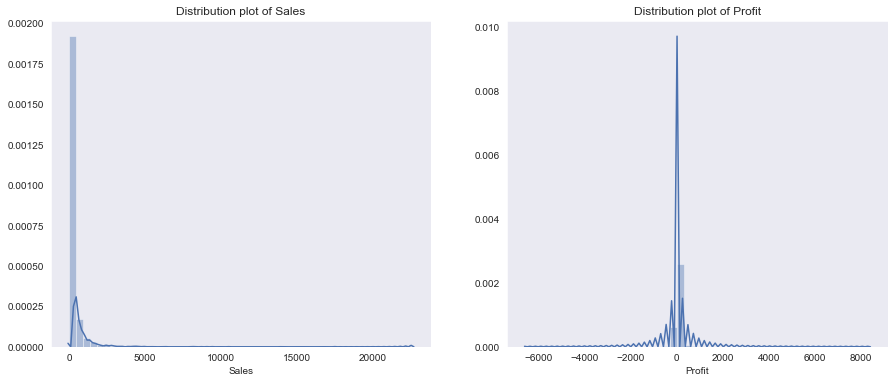

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.distplot(df.loc[:,'Sales'], norm_hist=True, ax=ax[0])
ax[0].set_title('Distribution plot of Sales')

sns.distplot(df.loc[:,'Profit'], norm_hist=True, ax=ax[1])
ax[1].set_title('Distribution plot of Profit')

The sales column seems to be right-skewed whereas the profit column is centered around 0.

Defining a function for plotting the countplot of a column and its comparision with the profit.

In [9]:
def plot(dataframe, x):
    fig, ax = plt.subplots(1, 2, figsize=(15,6))
    sns.countplot(dataframe[x].sort_values(), ax=ax[0])
    ax[0].set_title('Countplot of {}'.format(x))

    df_x = dataframe.groupby(x).agg({'Profit': np.sum})
    sns.barplot(df_x.index, df_x['Profit'], ax=ax[1])
    ax[1].set_title('{} vs Profit'.format(x))

Plotting the first column, Ship Mode.

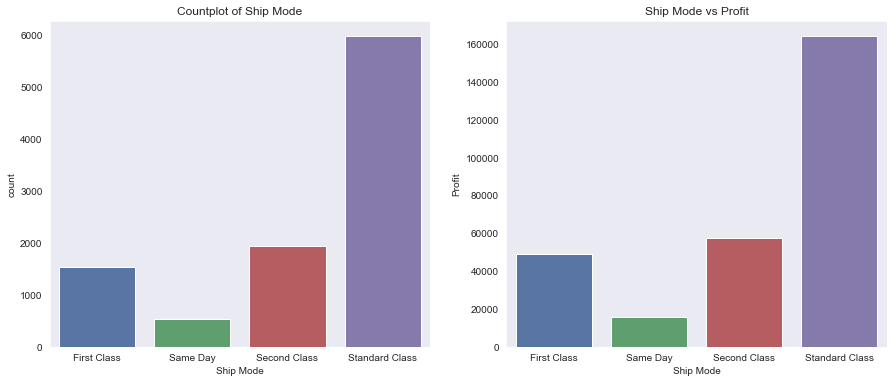

In [10]:
plot(df, 'Ship Mode')

It is observed that standard class is the most frequently used option, hence naturally, it is the class giving the most profit as most orders are placed through this class. Same day is the least selected option, hence leading to the lowest amount of profit.

Plotting the segment column.

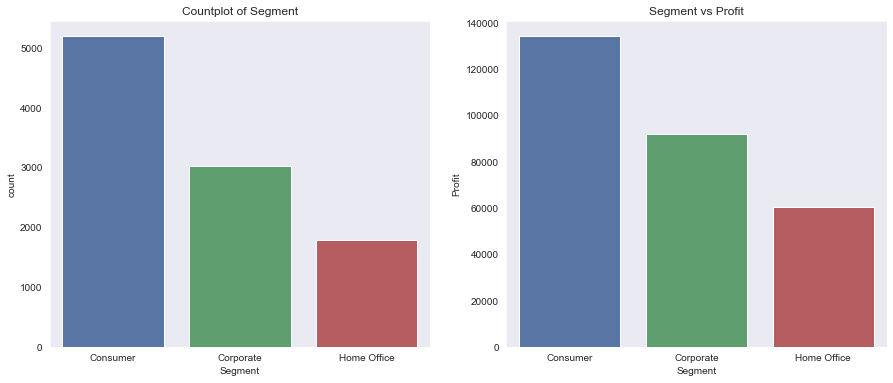

In [11]:
plot(df, 'Segment')

Consumer is the most widely present segment followed by corporate and home office. On comparision with profit, similar results are observed.

Plotting the region column.

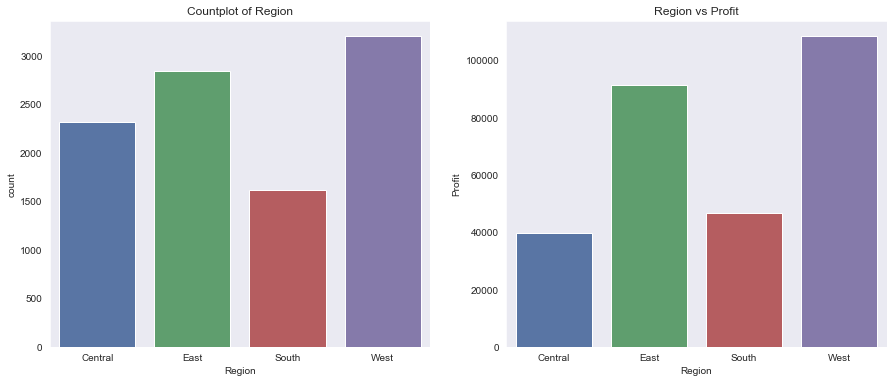

In [12]:
plot(df, 'Region')

West region remains the most dominant one, closely followed by east. A difference observed in these 2 graphs is that despite central region having a lot of orders, it has not generated satisfactory profit. Infact, the profit is less than south which has the least number of orders. This may be something to look into.

Plotting the category column.

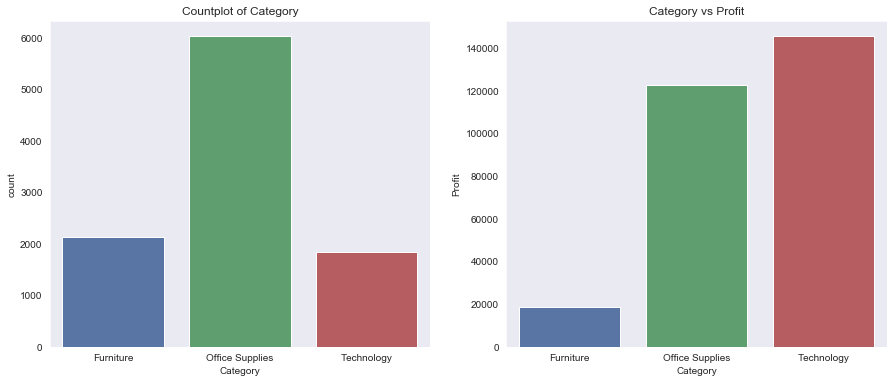

In [13]:
plot(df, 'Category')

It is observed that technology has the least number of purchases but generates the highest amount of profits. This may be due to the fact that technological items are costly and not purchased often, whereas office supplies being cheap and an everyday requirement are purchased in mass numbers. 

Doing the same for the sub category column. Not using the function because rotation of x-axis labels are required.

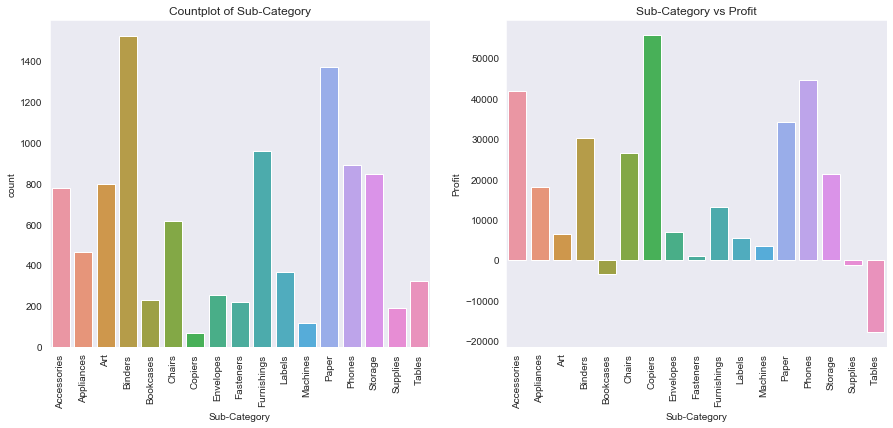

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.countplot(df['Sub-Category'].sort_values(), ax=ax[0])
ax[0].set_title('Countplot of Sub-Category')
ax[0].tick_params('x', labelrotation=90)

df_x = df.groupby('Sub-Category').agg({'Profit': np.sum})
sns.barplot(df_x.index, df_x['Profit'], ax=ax[1])
ax[1].set_title('Sub-Category vs Profit')
ax[1].tick_params('x', labelrotation=90)

A stark difference observed immediately is that tables have generated a lot of negative profit, i.e., loss. Bookcases and supplies have also resulted in loss but not as much as tables. This may be a point of furthur consideration. Moreover, binders and paper are the most selling items, as they belong to office supplies, and copiers and phones are most profit-generating, both belonging to technology.

The following gives more clarity as to which item belongs to which category.

Furniture:

In [15]:
df[df['Category'] == 'Furniture']['Sub-Category'].value_counts()

Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: Sub-Category, dtype: int64

Office Supplies:

In [16]:
df[df['Category'] == 'Office Supplies']['Sub-Category'].value_counts()

Binders       1523
Paper         1370
Storage        846
Art            796
Appliances     466
Labels         364
Envelopes      254
Fasteners      217
Supplies       190
Name: Sub-Category, dtype: int64

Technology:

In [17]:
df[df['Category'] == 'Technology']['Sub-Category'].value_counts()

Phones         889
Accessories    775
Machines       115
Copiers         68
Name: Sub-Category, dtype: int64

Plotting the quantity column.

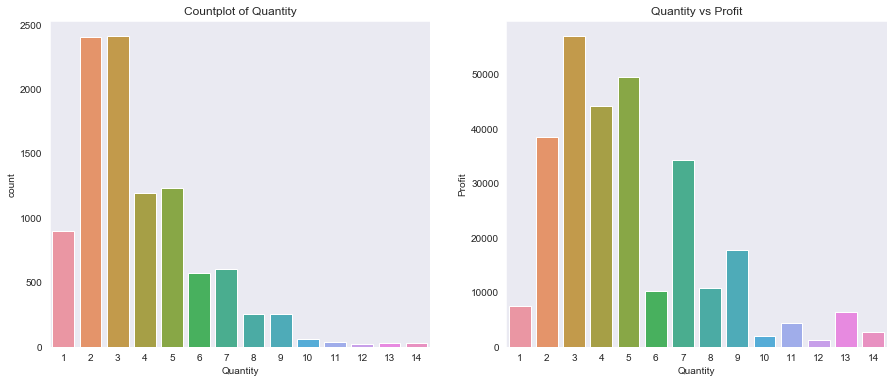

In [18]:
plot(df, 'Quantity')

The amount of items ordered is somewhat similar to the profits made.

Now, plotting the discount column.

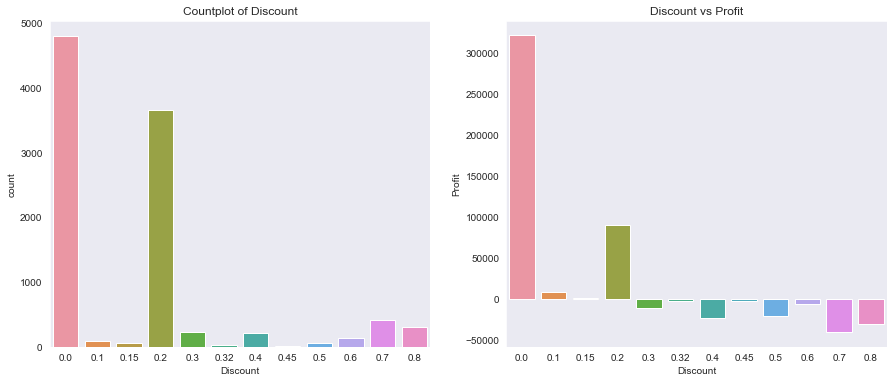

In [19]:
plot(df, 'Discount')

It is observed that most items are not sold on discount and that 0 is the category giving the most profit. However, it is observed that from 30% (0.3) onwards, any furthur discount given has always resulted in loss. This indicates that giving a discount beyond 20% is not a feasible option at all, especially huge discounts like 70 and 80%.

Exploring the state column.

Count, which indicates the number of orders or purchases, sorted in descending order.

Text(0.5, 1.0, 'Countplot of States')

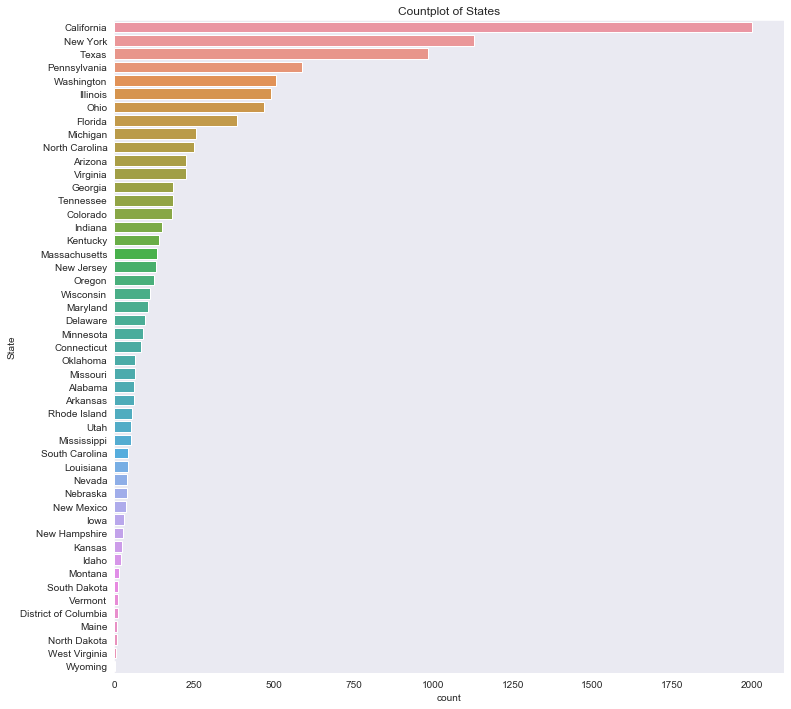

In [20]:
plt.figure(figsize=(12,12))
sns.countplot(y=df['State'].sort_values(), order=df['State'].value_counts().index)
plt.title('Countplot of States')

The states having the maximum counts are California, New York and Texas.

A map is also plotted for better visualisation of the above.

In [21]:
states = ['AL','AZ','AR','CA','CO','CT','DE','DC','FL','GA','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN',
          'MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA',
          'WA','WV','WI','WY']
df_state = df.groupby('State').size().reset_index(name='counts')
map1 = px.choropleth(df_state, locations=states, locationmode='USA-states', color='counts', color_continuous_scale='burgyl',
                     scope='usa', hover_name='State', title='Count of Entries from Various States')
map1.update_layout(geo_scope='usa')
map1.show()

State vs Profit.

Text(0.5, 1.0, 'State vs Profit')

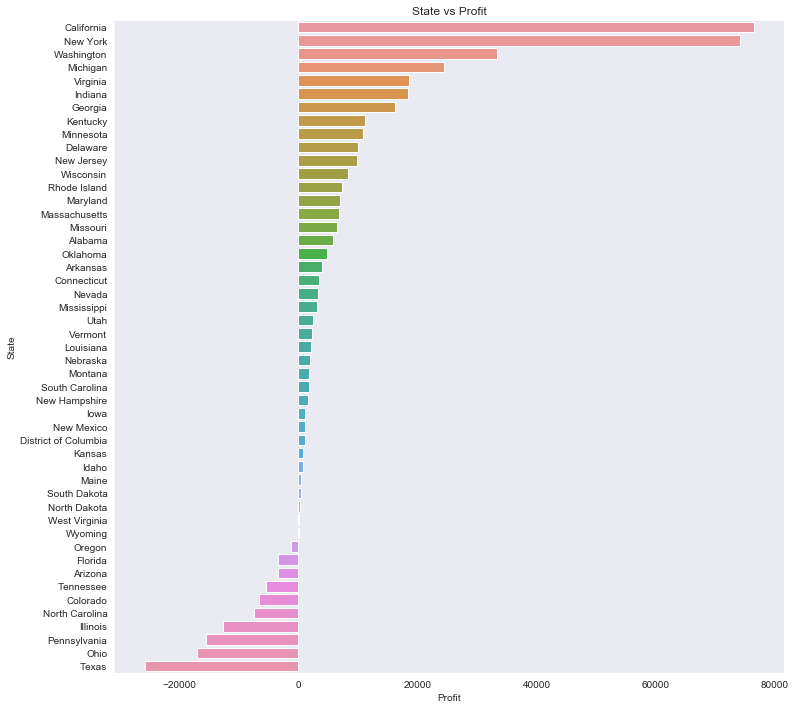

In [22]:
df_state = df.groupby('State').agg({'Profit': np.sum})
df_state = df_state.sort_values('Profit', ascending=False)
plt.figure(figsize=(12,12))
sns.barplot(df_state['Profit'], df_state.index)
plt.title('State vs Profit')

California and New York have the highest profits as expected. But Texas which has the third highest number of orders is at the bottom of the profit spectrum. It is the state having the highest amount of loss. Quite unexpected! Moreover, this trend is also observed in a few other states as well like Pennsylvania, Illinois, Ohio and so on.

The above visualisation is also represented by a map for better understanding.

In [23]:
df_state = df.groupby('State').agg({'Profit': np.sum})
map2 = px.choropleth(df_state, locations=states, locationmode='USA-states', color='Profit',color_continuous_scale='burgyl',
                     scope='usa', hover_name=df_state.index,title='Profit Gained from Various States')
map2.update_layout(geo_scope='usa')
map2.show()

Diving deeper into this problem by looking at Texas alone.

In [24]:
texas = df[df['State'] == 'Texas']
texas

Ship Mode      Segment        Country        City  State  \
14    Standard Class  Home Office  United States  Fort Worth  Texas   
15    Standard Class  Home Office  United States  Fort Worth  Texas   
34      Second Class  Home Office  United States     Houston  Texas   
35       First Class    Corporate  United States  Richardson  Texas   
36       First Class    Corporate  United States  Richardson  Texas   
...              ...          ...            ...         ...    ...   
9919  Standard Class    Corporate  United States       Bryan  Texas   
9920  Standard Class    Corporate  United States       Bryan  Texas   
9961     First Class  Home Office  United States     Houston  Texas   
9962     First Class  Home Office  United States     Houston  Texas   
9972  Standard Class     Consumer  United States     Houston  Texas   

      Postal Code   Region         Category Sub-Category      Sales  Quantity  \
14          76106  Central  Office Supplies   Appliances    68.8100         5   
15          76106  Central  Office Supplies      Binders     2.5440         3   
34          77095  Central  Office Supplies        Paper    29.4720         3   
35          75080  Central       Technology       Phones  1097.5440         7   
36          75080  Central        Furniture  Furnishings   190.9200         5   
...           ...      ...              ...          ...        ...       ...   
9919        77803  Central        Furniture       Chairs   528.4300         5   
9920        77803  Central  Office Supplies      Binders    22.3860         7   
9961        77041  Central  Office Supplies        Paper    65.5840         2   
9962        77041  Central        Furniture    Bookcases   383.4656         4   
9972        77041  Central  Office Supplies    Envelopes    99.5680         2   

      Discount    Profit  
14        0.80 -123.8580  
15        0.80   -3.8160  
34        0.20    9.9468  
35        0.20  123.4737  
36        0.60 -147.9630  
...        ...       ...  
9919      0.30 -143.4310  
9920      0.80  -35.8176  
9961      0.20   23.7742  
9962      0.32  -67.6704  
9972      0.20   33.6042  

[985 rows x 13 columns]

Since the discount column provided the most insights earlier, it is explored.

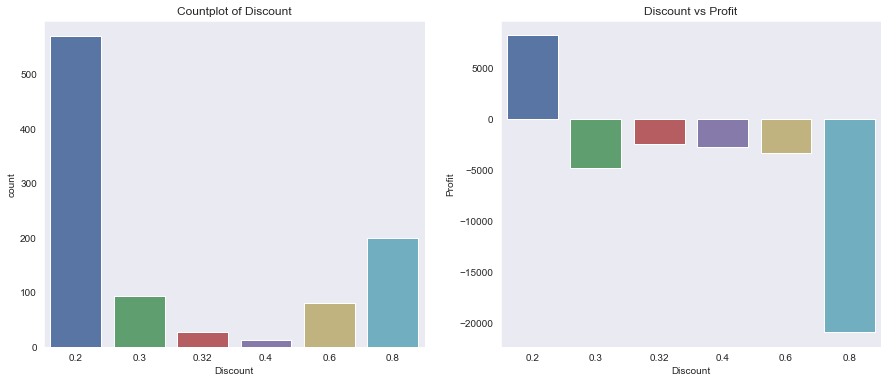

In [25]:
plot(texas, 'Discount')

Every single item in Texas has been sold at a discounted rate. Moreover, a lot of items have been sold at 80% discount, which has inevitably lead to huge amounts of loss. 

Looking at the quantity column as well.

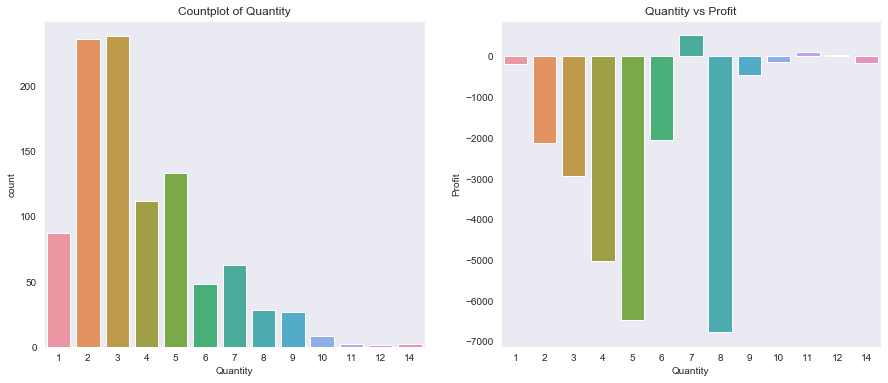

In [26]:
plot(texas, 'Quantity')

It is observed that huge losses are incurred, especially for items sold at quantities of eight and five.

Quantity vs Discount.

Text(0.5, 1.0, 'Quantity vs Discount')

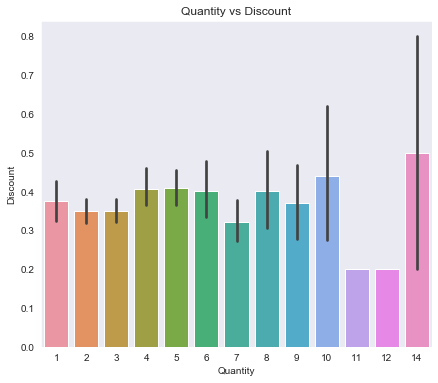

In [27]:
plt.figure(figsize=(7,6))
sns.barplot(texas['Quantity'].sort_values(), texas['Discount'])
plt.title('Quantity vs Discount')

Diving deeper into the category column.

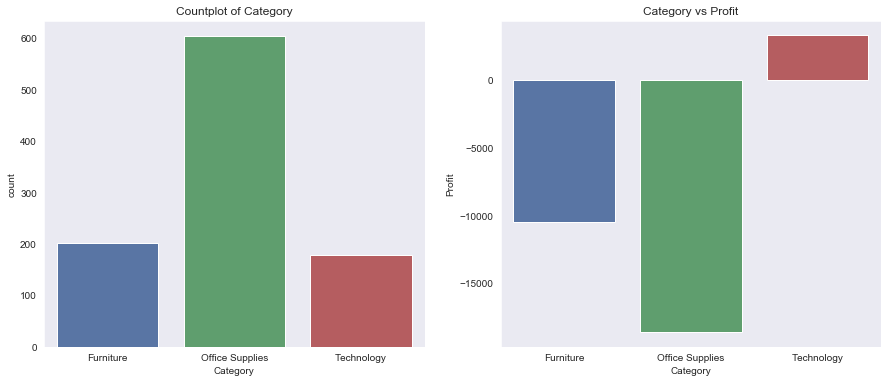

In [28]:
plot(texas, 'Category')

Furniture and office supplies have led to the most losses, especially office supplies.

Category vs Discount.

Text(0.5, 1.0, 'Category vs Discount')

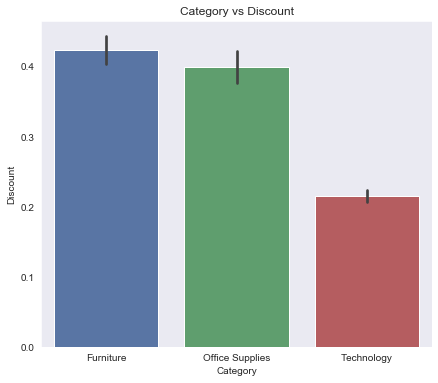

In [29]:
plt.figure(figsize=(7,6))
sns.barplot(texas['Category'].sort_values(), texas['Discount'])
plt.title('Category vs Discount')

Furniture and Office Supplies are also the categories with the most amount of discount offered.

Diving deeper into the sub-category column to see what is causing the problem within furniture and office supplies.

Just to remember from before,

Furniture: Furnishings, Chairs, Tables, Bookcases

Office Supplies: Binders, Paper, Storage, Art, Appliances, Labels, Envelopes, Fasteners, Supplies

Technology: Phones, Accessories, Machines, Copiers

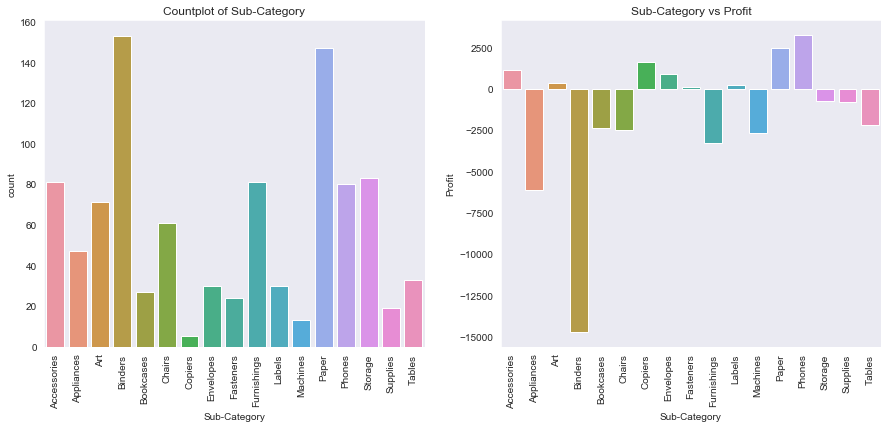

In [30]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.countplot(texas['Sub-Category'].sort_values(), ax=ax[0])
ax[0].set_title('Countplot of Sub-Category')
ax[0].tick_params('x', labelrotation=90)

df_x = texas.groupby('Sub-Category').agg({'Profit': np.sum})
sns.barplot(df_x.index, df_x['Profit'], ax=ax[1])
ax[1].set_title('Sub-Category vs Profit')
ax[1].tick_params('x', labelrotation=90)

Binders are the most sold item but also the item causing the most loss.

Sub-Category vs Discount.

Text(0.5, 1.0, 'Sub-Category vs Discount')

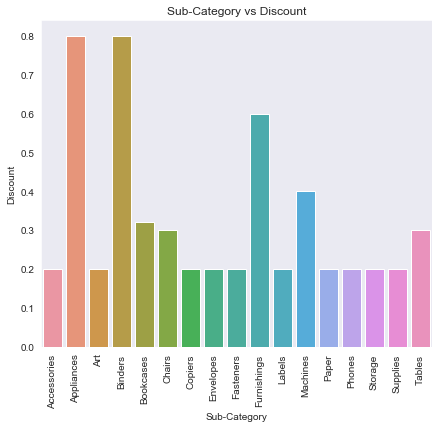

In [31]:
plt.figure(figsize=(7,6))
sns.barplot(texas['Sub-Category'].sort_values(), texas['Discount'])
plt.xticks(rotation=90)
plt.title('Sub-Category vs Discount')

Evidently, binders and appliances being the ones causing the highest loss are also the ones sold at the highest discount rate.

Taking a look at the cities causing the most problem within Texas.

In [32]:
texas_cities = texas.groupby('City').agg({'Profit': np.sum})
texas_cities = texas_cities.sort_values('Profit')

Countplot showing the number of orders in each city of Texas.

Text(0.5, 1.0, 'Countplot of Cities within Texas')

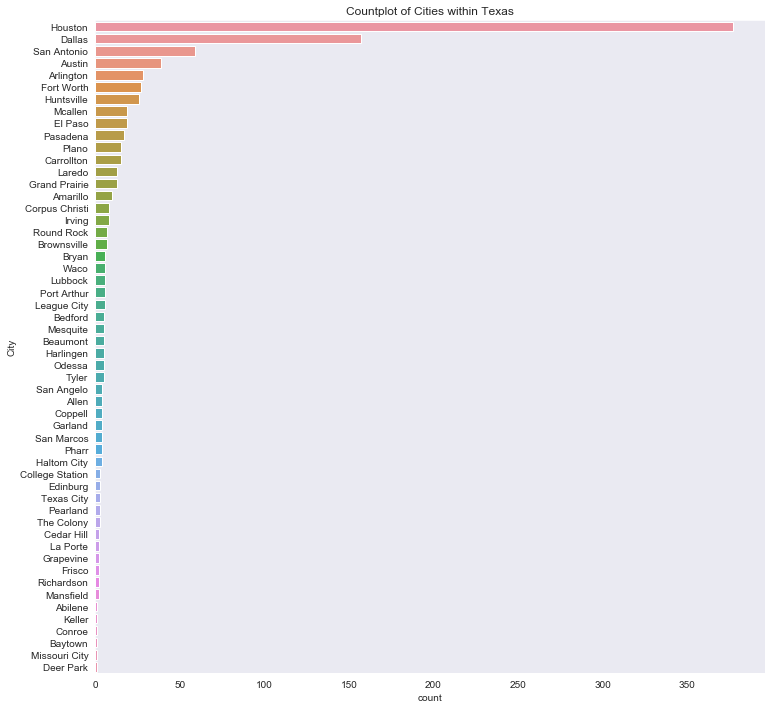

In [33]:
plt.figure(figsize=(12,12))
sns.countplot(y=texas['City'].sort_values(), order=texas['City'].value_counts().index)
plt.title('Countplot of Cities within Texas')

Houston and Dallas have made the most purchases.

City vs Profit.

Text(0.5, 1.0, 'City vs Profit')

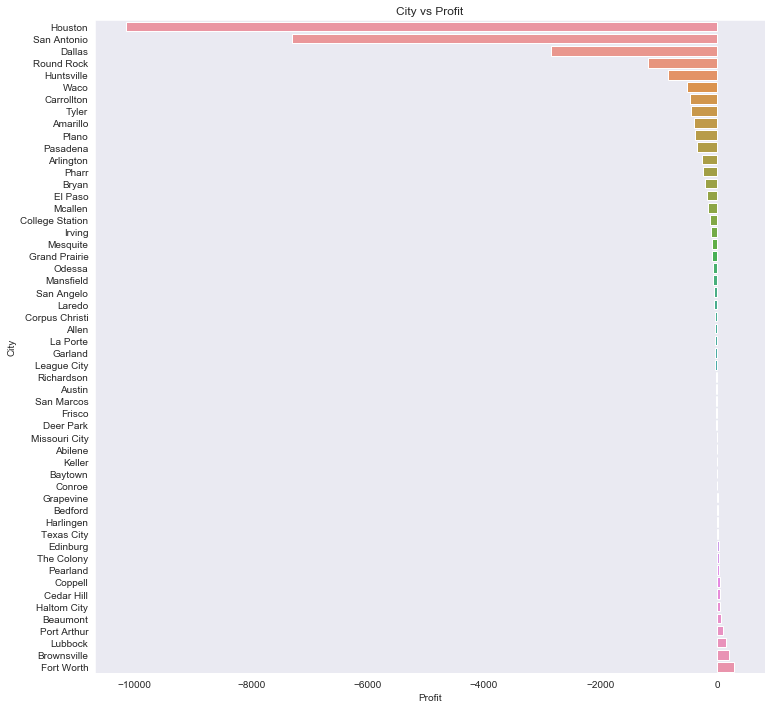

In [34]:
plt.figure(figsize=(12,12))
sns.barplot(texas_cities['Profit'], texas_cities.index)
plt.title('City vs Profit')

Naturally, Houston has the highest losses, but what stands out is San Antonio having a huge loss despite having less number of purchases.

San Antonio vs Discount.

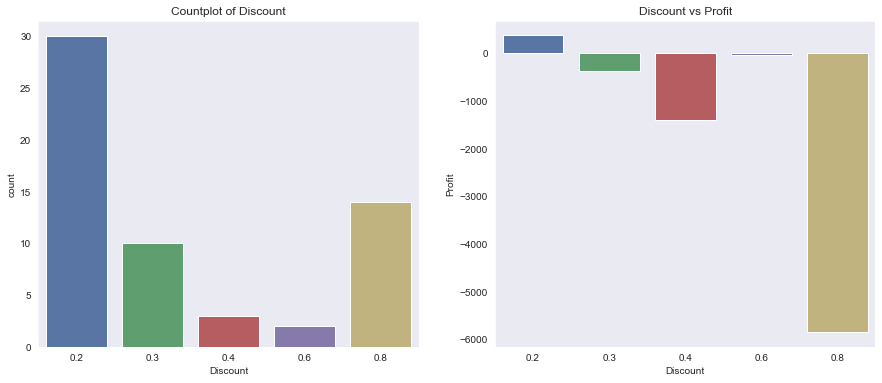

In [35]:
plot(texas[texas['City'] == 'San Antonio'], 'Discount')

Once again, the problem is traced back to discount.

Finally, lets compare our analysis of Texas to California, which has the highest amount of profit. This is to ensure that our analysis regarding discount is correct.

In [36]:
california = df[df['State'] == 'California']
california

Ship Mode    Segment        Country         City       State  \
2       Second Class  Corporate  United States  Los Angeles  California   
5     Standard Class   Consumer  United States  Los Angeles  California   
6     Standard Class   Consumer  United States  Los Angeles  California   
7     Standard Class   Consumer  United States  Los Angeles  California   
8     Standard Class   Consumer  United States  Los Angeles  California   
...              ...        ...            ...          ...         ...   
9986  Standard Class   Consumer  United States  Los Angeles  California   
9990  Standard Class   Consumer  United States   Costa Mesa  California   
9991  Standard Class   Consumer  United States   Costa Mesa  California   
9992  Standard Class   Consumer  United States   Costa Mesa  California   
9993    Second Class   Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
2           90036   West  Office Supplies       Labels   14.620         2   
5           90032   West        Furniture  Furnishings   48.860         7   
6           90032   West  Office Supplies          Art    7.280         4   
7           90032   West       Technology       Phones  907.152         6   
8           90032   West  Office Supplies      Binders   18.504         3   
...           ...    ...              ...          ...      ...       ...   
9986        90008   West       Technology  Accessories   36.240         1   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount   Profit  
2          0.0   6.8714  
5          0.0  14.1694  
6          0.0   1.9656  
7          0.2  90.7152  
8          0.2   5.7825  
...        ...      ...  
9986       0.0  15.2208  
9990       0.0  15.6332  
9991       0.2  19.3932  
9992       0.0  13.3200  
9993       0.0  72.9480  

[2001 rows x 13 columns]

Exploring the discount column.

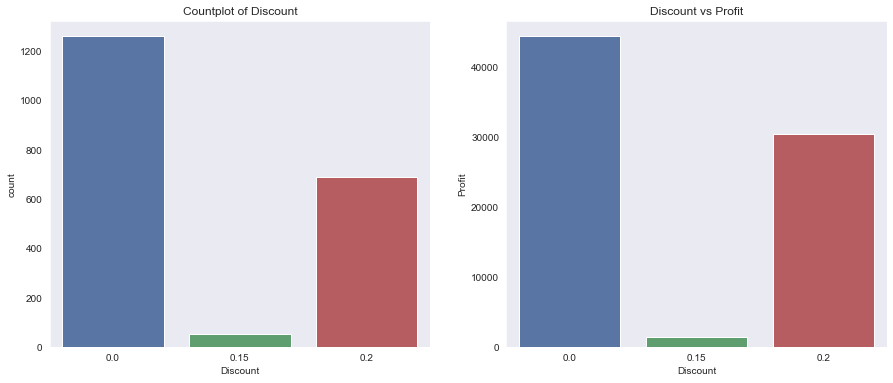

In [37]:
plot(california, 'Discount')

Most of the items have been sold at no discount and the maximum discount offered is 20%.

Plotting the quantity column as well.

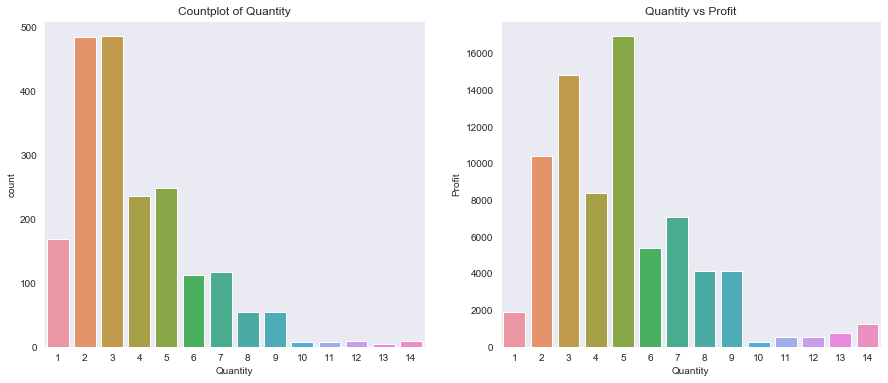

In [38]:
plot(california, 'Quantity')

The profits made are consistent with the quantities, with 5 items ordered together giving the most profit.

Exploring the category column.

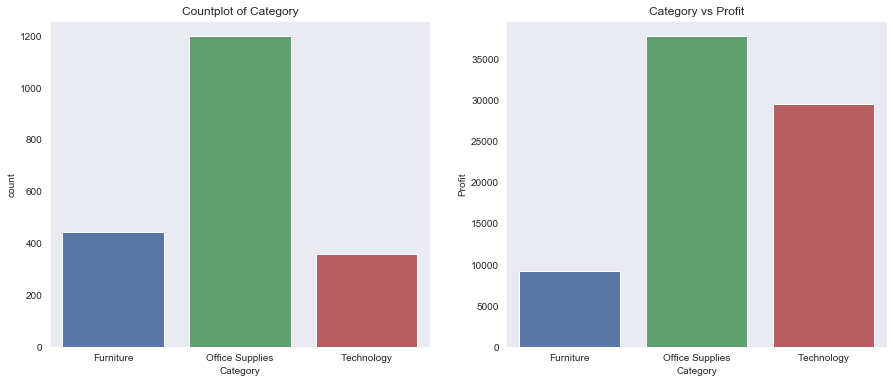

In [39]:
plot(california, 'Category')

The profit is also consistent with the number of items sold.

Category vs Discount.

Text(0.5, 1.0, 'Category vs Discount')

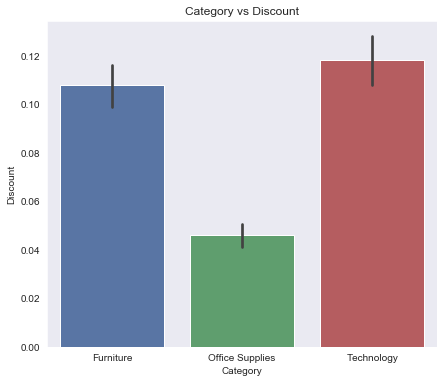

In [40]:
plt.figure(figsize=(7,6))
sns.barplot(california['Category'].sort_values(), california['Discount'])
plt.title('Category vs Discount')

Discount has been offered on costlier items and not on cheaper items, leading to profit. 

Exploring the cities.

Text(0.5, 1.0, 'Countplot of Cities within California')

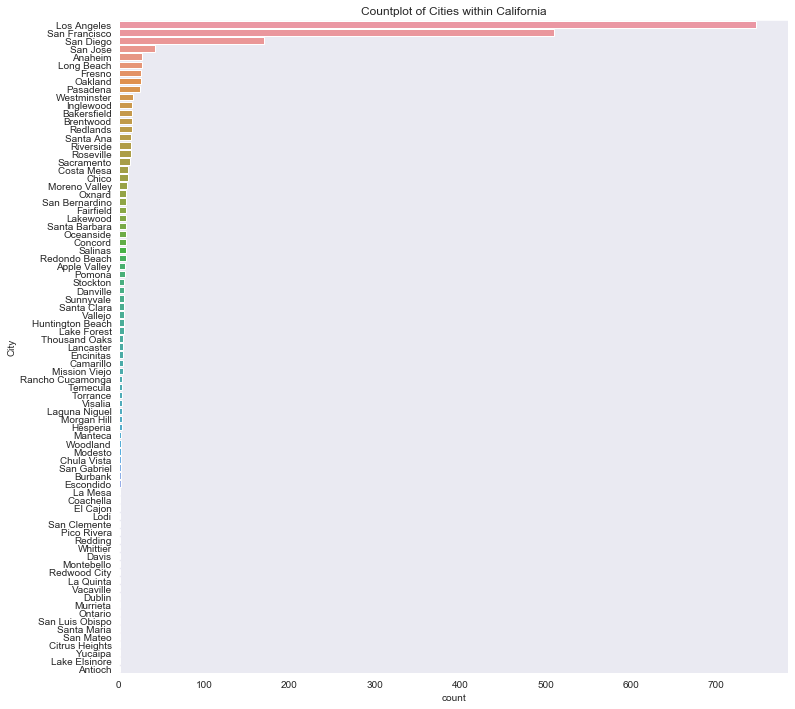

In [41]:
plt.figure(figsize=(12,12))
sns.countplot(y=california['City'].sort_values(), order=california['City'].value_counts().index)
plt.title('Countplot of Cities within California')

Text(0.5, 1.0, 'City vs Profit')

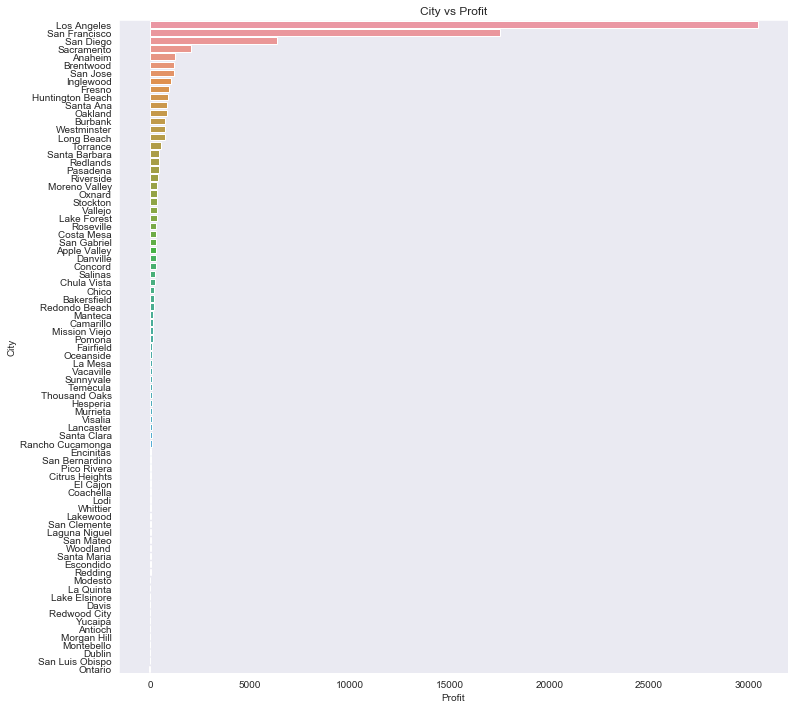

In [42]:
cali_cities = california.groupby('City').agg({'Profit': np.sum})
cali_cities = cali_cities.sort_values('Profit', ascending=False)

plt.figure(figsize=(12,12))
sns.barplot(cali_cities['Profit'], cali_cities.index)
plt.title('City vs Profit')

The results are consistent city-wise as well, Los Angeles, San Francisco and San Diego being the cities with the most purchases as well as the highest profits.

Finally, to conclude this analysis, it can be said that more focus should be placed on states like Texas (present in the Central region) where huge losses are incurred. A possible reason for this is the huge discounts offered on items such as office supplies. There may be other factors conributing to this problem as well, but they aren't present in this particular dataset. 